<a href="https://colab.research.google.com/github/vjnbarot/datasharing/blob/master/Machine_Learning_ProjectREUPLOAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Dataset

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# variable information
display(heart_disease.variables)

,name,role,type,demographic,description,units,missing_values
0,age,Feature,Integer,Age,None,years,no
1,sex,Feature,Categorical,Sex,None,None,no
2,cp,Feature,Categorical,None,None,None,no
3,trestbps,Feature,Integer,None,resting blood pressure (on admission to the ho...,mm Hg,no
4,chol,Feature,Integer,None,serum cholestoral,mg/dl,no
5,fbs,Feature,Categorical,None,fasting blood sugar > 120 mg/dl,None,no
6,restecg,Feature,Categorical,None,None,None,no
7,thalach,Feature,Integer,None,maximum heart rate achieved,None,no
8,exang,Feature,Categorical,None,exercise induced angina,None,no
9,oldpeak,Feature,Integer,None,ST depression induced by exercise relative to ...,None,no


In [ ]:
import pandas as pd

# Combine X and y into one DataFrame
heart_disease_df = pd.concat([X, y], axis=1)

# Data Cleaning

In [ ]:
# Count missing values in each column
missing_counts = heart_disease_df.isnull().sum()

# Total number of missing values across the entire DataFrame
total_missing = missing_counts.sum()

print(f"Total missing values: {total_missing}")

# Drop rows with any missing values
heart_disease_df_cleaned = heart_disease_df.dropna()

# Print some info to verify
print(f"Original shape: {heart_disease_df.shape}")
print(f"Cleaned shape: {heart_disease_df_cleaned.shape}")


Total missing values: 6
Original shape: (303, 14)
Cleaned shape: (297, 14)


In [ ]:
# Display information about each column
print(heart_disease_df_cleaned.info())

# Alternatively, describe each column statistically
print(heart_disease_df_cleaned.describe(include='all').round(2))


<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  num       297 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 34.8 KB
None
          age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  297.00  297.00  297.00    297.00  297.00  297.00   297.00   297.00   
mean    54.54    0.68    3.16    131.69  247.35    0.14     1.00 

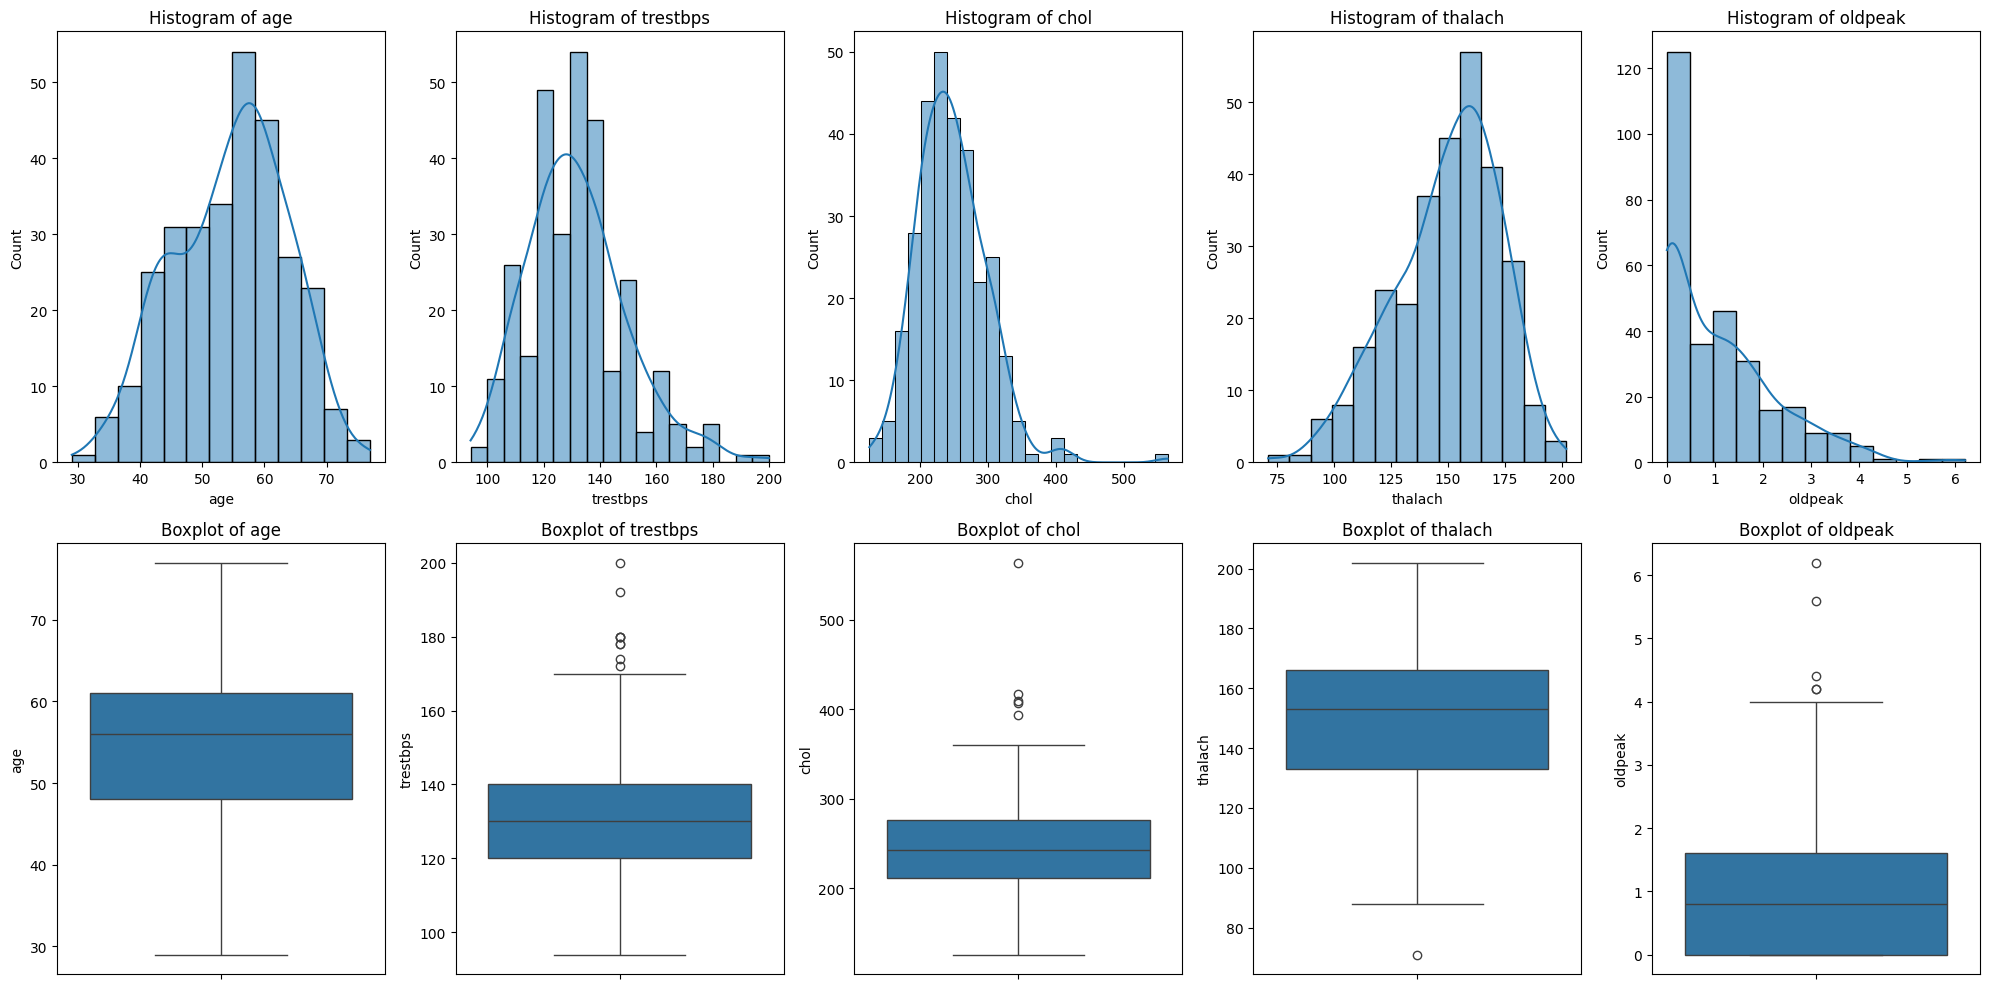

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming heart_disease_df_cleaned is your cleaned DataFrame

cols_to_plot = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create histograms
fig, axes = plt.subplots(2, 5, figsize=(20, 10))  # Adjust figsize as needed

for i, col in enumerate(cols_to_plot):
    sns.histplot(heart_disease_df_cleaned[col], kde=True, ax=axes[0,i])  # Adjust ax
    axes[0,i].set_title(f"Histogram of {col}")

# Create boxplots
for i, col in enumerate(cols_to_plot):
    sns.boxplot(y=heart_disease_df_cleaned[col], ax=axes[1,i]) # Adjust ax
    axes[1,i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


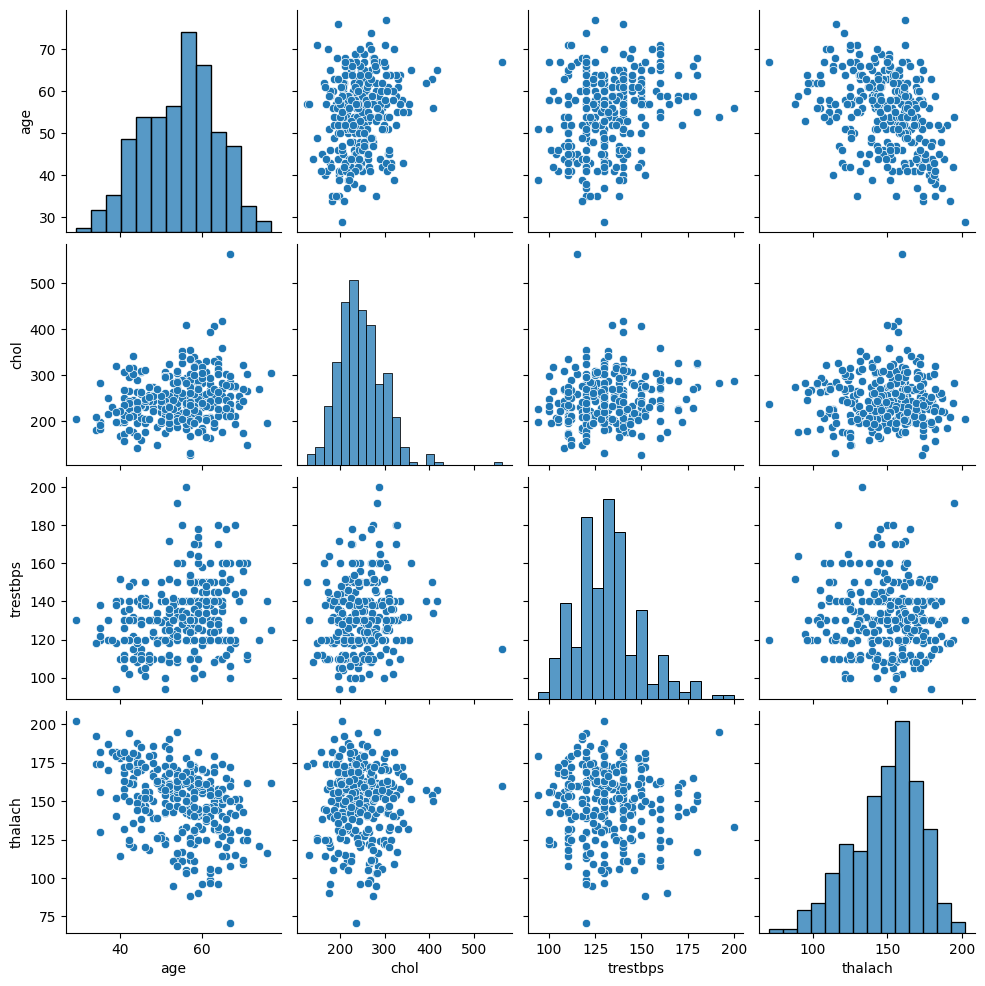

In [ ]:
sns.pairplot(heart_disease_df_cleaned[['age', 'chol', 'trestbps', 'thalach']])
plt.show()

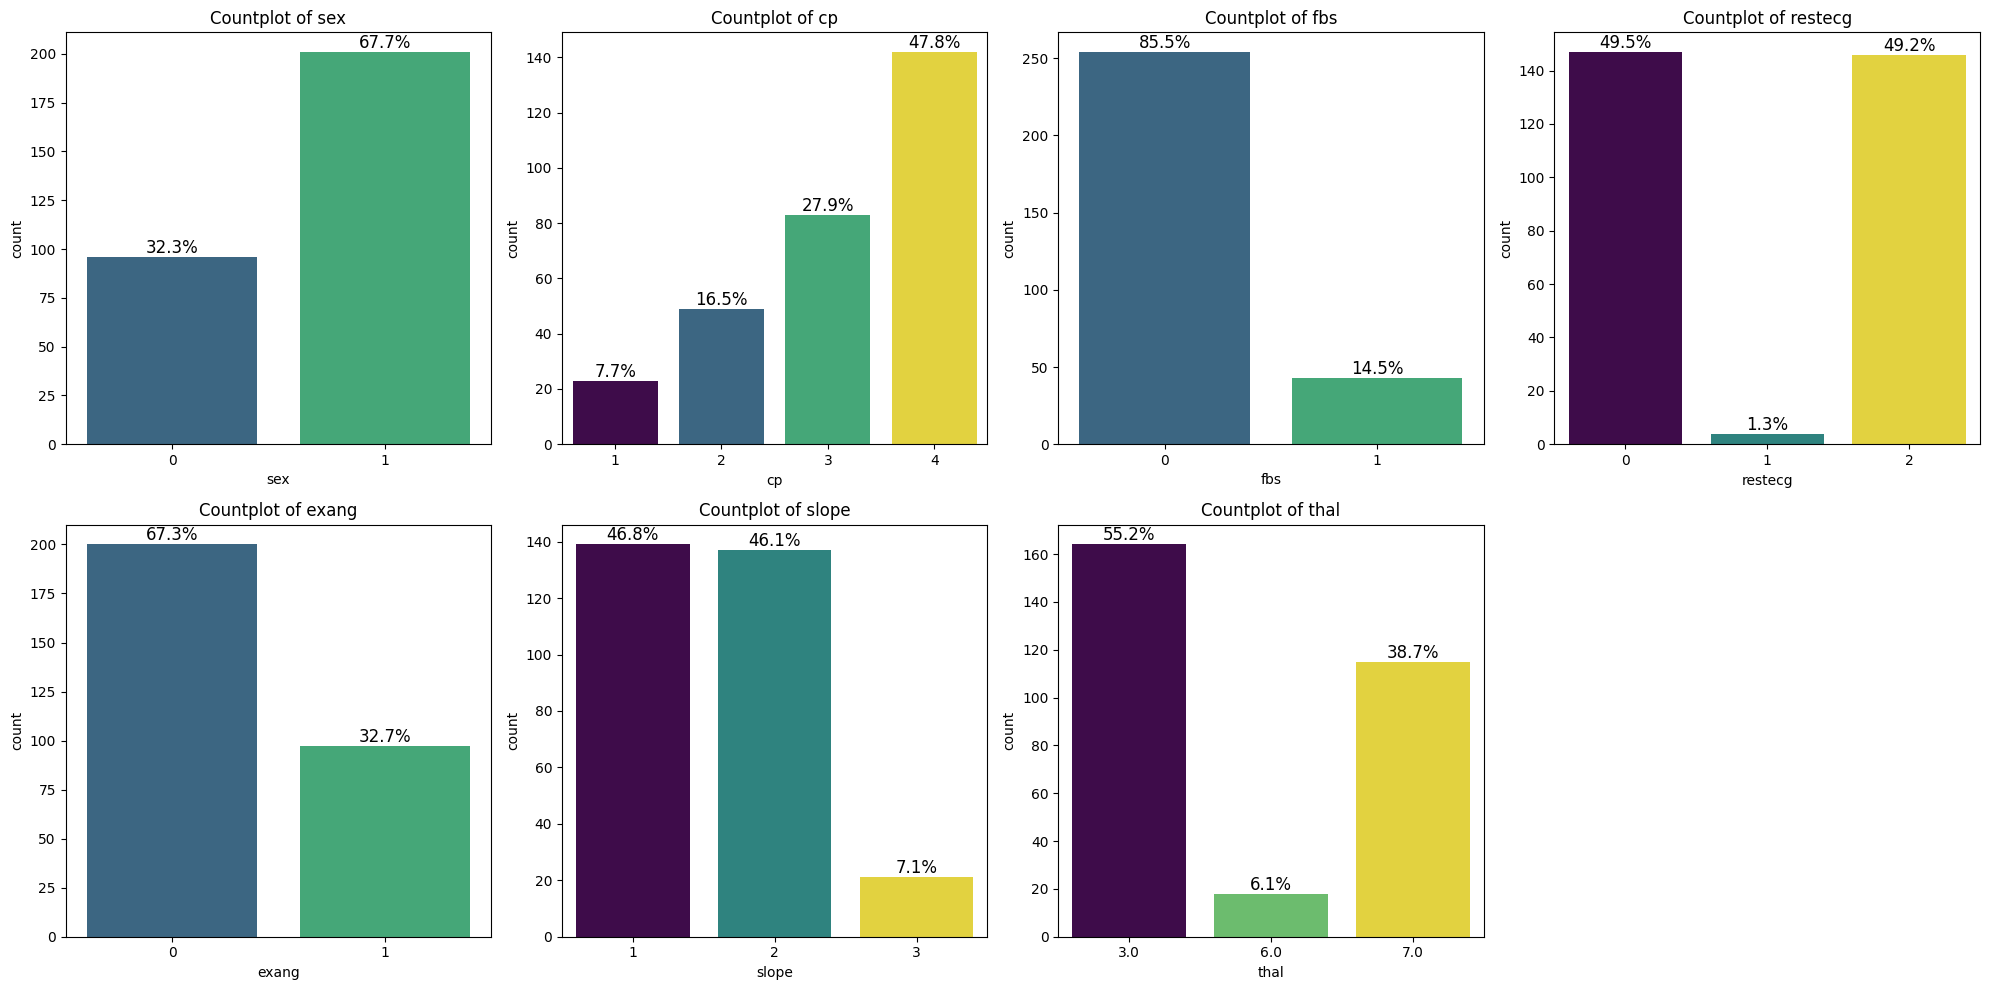

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
cols_to_plot = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

# Create a 2-row, 4-column subplot grid
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjust figsize as needed

# Loop over columns and create the count plots
for i, col in enumerate(cols_to_plot):
    row = i // 4
    col_idx = i % 4
    sns.countplot(x=col, data=heart_disease_df_cleaned, ax=axes[row, col_idx], palette="viridis", hue=col, legend=False)

    # Set title for each subplot
    axes[row, col_idx].set_title(f"Countplot of {col}")

    # Calculate percentages
    total = len(heart_disease_df_cleaned[col])
    for p in axes[row, col_idx].patches:
        height = p.get_height()
        percentage = 100 * height / total
        axes[row, col_idx].annotate(f'{percentage:.1f}%',
                                     (p.get_x() + p.get_width() / 2, height),
                                     ha='center', va='bottom', size=12)

# Remove any empty subplots if the number of plots isn't a multiple of 4
if len(cols_to_plot) % 4 != 0:
    fig.delaxes(axes[1, 3])

# Tighten layout for better spacing
plt.tight_layout()
plt.show()


# Mutlicolinearity

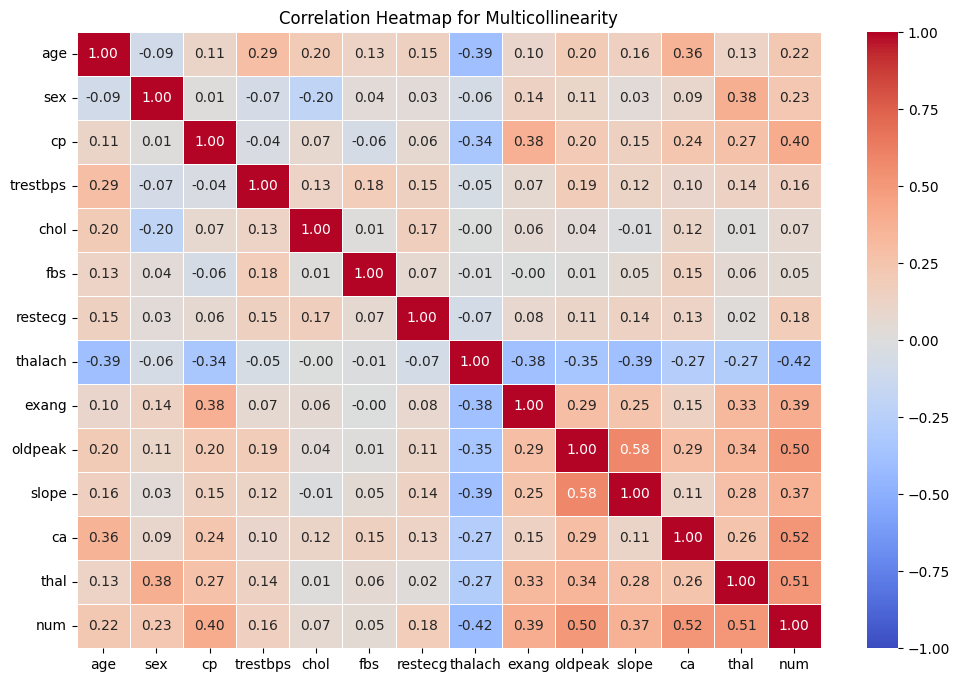

     feature         VIF
0      const  252.344079
1        age    1.501707
2        sex    1.315223
3         cp    1.375980
4   trestbps    1.218085
5       chol    1.137278
6        fbs    1.079550
7    restecg    1.106332
8    thalach    1.671862
9      exang    1.395297
10   oldpeak    1.827828
11     slope    1.696987
12        ca    1.602386
13      thal    1.633717
14       num    2.316462


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming you have a DataFrame `heart_disease_df_cleaned`
# Calculate the correlation matrix
corr_matrix = heart_disease_df_cleaned.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap for Multicollinearity')
plt.show()



from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Add a constant for the intercept term in the regression
X = add_constant(heart_disease_df_cleaned)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)



## mutlicolinearty interpetation

All VIF values are below 5, which is generally considered acceptable. In particular, a VIF close to 1 suggests no multicollinearity, while values between 1 and 5 indicate that there is little to no multicollinearity.

The highest VIF value is for const (the intercept), which is expected and not an issue since the constant term doesn't affect the predictors' relationships.

## Target Variable

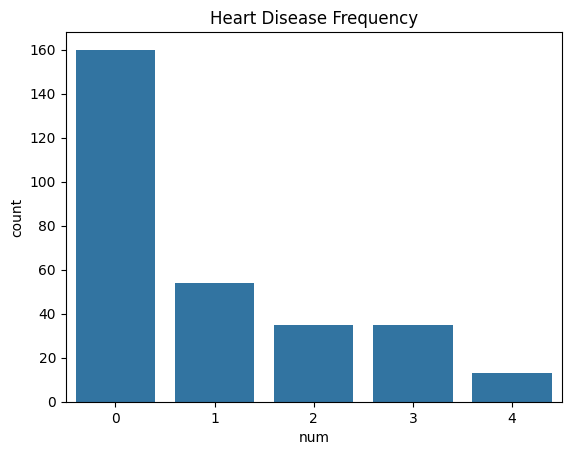

In [ ]:
sns.countplot(x='num', data=heart_disease_df_cleaned)
plt.title('Heart Disease Frequency')
plt.show()

<ipython-input-58-9d3a5f46f838>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_disease_df_cleaned['heart_disease'] = heart_disease_df_cleaned['num'].apply(lambda x: 1 if x > 0 else 0)


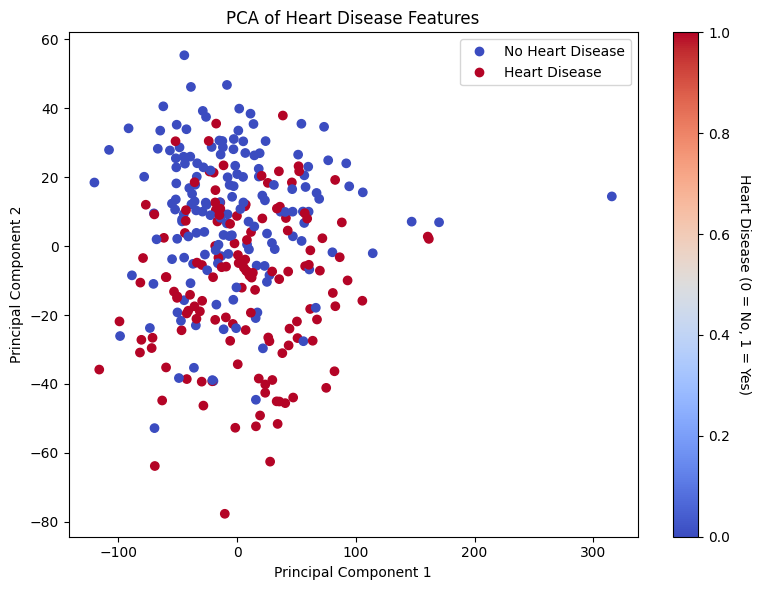

[0.74593304 0.14980366]
[[ 3.71387736e-02 -1.78996141e-03  1.33787553e-03  5.13080326e-02
   9.97978018e-01  1.12961489e-04  3.21113432e-03 -1.93025570e-03
   5.52599314e-04  9.72261958e-04 -6.70634227e-05  2.16053501e-03
   5.33899071e-04  1.67974267e-03]
 [-1.81644236e-01 -1.07136043e-03 -1.36153327e-02 -1.15577301e-01
   1.47149176e-02 -4.91731869e-04 -3.76076425e-03  9.75445583e-01
  -7.66850254e-03 -1.82511493e-02 -1.05232842e-02 -1.16648845e-02
  -2.38750054e-02 -2.29564817e-02]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(heart_disease_df_cleaned.select_dtypes(include=['float64', 'int64']))

# Create a new column where anything 1 or higher indicates heart disease
heart_disease_df_cleaned['heart_disease'] = heart_disease_df_cleaned['num'].apply(lambda x: 1 if x > 0 else 0)

# Create the scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=heart_disease_df_cleaned['heart_disease'], cmap='coolwarm', marker='o')

# Add a colorbar and set its label
cbar = plt.colorbar(scatter)
cbar.set_label('Heart Disease (0 = No, 1 = Yes)', rotation=270, labelpad=15)

# Title and labels
plt.title('PCA of Heart Disease Features')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Display the legend manually
handles, labels = scatter.legend_elements()
plt.legend(handles, ['No Heart Disease', 'Heart Disease'], loc='upper right')

plt.tight_layout()
plt.show()

print(pca.explained_variance_ratio_)

print(pca.components_)

